In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize, rescale
from scipy import ndimage
import skimage.filters
import math
import os
from cmath import exp, pi
from math import log, ceil
import time
from skimage import filters

In [2]:
from skimage.morphology import (square, rectangle, diamond, disk, star, octagon)
from scipy.ndimage import binary_hit_or_miss as hm
from skimage.measure import regionprops
from skimage.color import label2rgb

In [ ]:
def connComps(im,sigma=1,meanFrac=0.8): # im is a binary image
    img = filters.gaussian(im, sigma)
    blobs = img > meanFrac*img.mean()
    labels, nb = ndimage.label(blobs)            
    return labels,nb

def CCL8(im,sigma=1,meanFrac=0.8): # im is a binary image
    img = filters.gaussian(im, sigma)
    blobs = img > meanFrac*img.mean()
    labels, nb = ndimage.label(blobs,structure=np.ones((3,3)))            
    return labels,nb


In [219]:
im = cv2.imread("../images/thumb_print.jpg",0)

In [244]:
S1 = np.array([[0,0,0],[0,1,0],[1,1,1]])
S2 = np.array([[1,0,0],[1,1,0],[0,1,0]])

In [229]:
def sk1(image, S):
    out = image.copy() 
    for vertical_pos in range(image.shape[0]-S.shape[0]):
        for horizontal_pos in range(image.shape[1]-S.shape[1]):
            window = image[vertical_pos:vertical_pos+S.shape[0], horizontal_pos:horizontal_pos+S.shape[1]]
            if np.array_equal(window[0,:],S[0,:]) and np.array_equal(window[1,1],S[1,1]) and np.array_equal(window[2,:],S[2,:]):
                out[vertical_pos, horizontal_pos] = 0
    return out

def sk2(image, S):
    out = image.copy() 
    for vertical_pos in range(image.shape[0]-S.shape[0]):
        for horizontal_pos in range(image.shape[1]-S.shape[1]):
            window = image[vertical_pos:vertical_pos+S.shape[0], horizontal_pos:horizontal_pos+S.shape[1]]
            if np.array_equal(window[0,1:],S[0,1:]) and np.array_equal(window[1,:],S[1,:]) and np.array_equal(window[2,1],S[2,1]):
                out[vertical_pos, horizontal_pos] = 0
    return out

In [230]:
def skeletonize(img,S1,S2,threshold):
    i1 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)[1]
    i2 = sk1(i1,S1)
    i3 = sk2(i2,S2)
    i2 = sk1(i3,np.rot90(S1,1))
    i3 = sk2(i2,np.rot90(S2,1))
    i2 = sk1(i3,np.rot90(S1,2))
    i3 = sk2(i2,np.rot90(S2,2))
    i2 = sk1(i3,np.rot90(S1,3))
    i3 = sk2(i2,np.rot90(S2,3))
    return i3

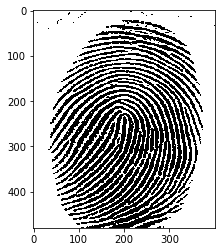

In [223]:
oss = skeletonize(im,S1,S2,127)
plt.imshow(oss,cmap='gray')

### Explain the role of structuring elements S1 and S2

In [231]:
threshold = 127
i1 = cv2.threshold(im, threshold, 255, cv2.THRESH_BINARY)[1]
i2 = sk1(i1,S1)
i3 = sk2(i2,S2)
i4 = sk1(i3,np.rot90(S1,1))
i5 = sk2(i4,np.rot90(S2,1))
i6 = sk1(i5,np.rot90(S1,2))
i7 = sk2(i6,np.rot90(S2,2))
i8 = sk1(i7,np.rot90(S1,3))
i9 = sk2(i8,np.rot90(S2,3))

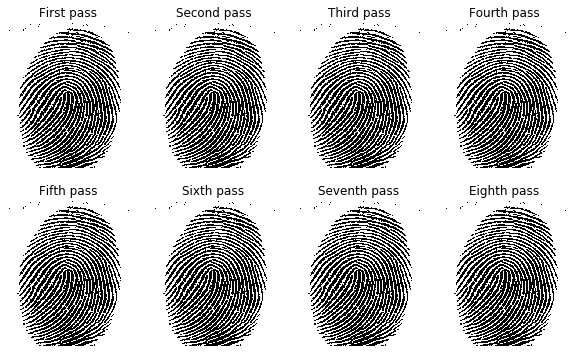

In [232]:
fig = plt.figure(figsize=(10,6))

ax1 = plt.subplot2grid((2,4), (0,0),)
ax2 = plt.subplot2grid((2,4), (0,1),)
ax3 = plt.subplot2grid((2,4), (0,2),)
ax4 = plt.subplot2grid((2,4), (0,3),)
ax5 = plt.subplot2grid((2,4), (1,0),)
ax6 = plt.subplot2grid((2,4), (1,1),)
ax7 = plt.subplot2grid((2,4), (1,2),)
ax8 = plt.subplot2grid((2,4), (1,3),)

ax1.imshow(i2,cmap = 'gray')
ax2.imshow(i3,cmap = 'gray')
ax3.imshow(i4,cmap = 'gray')
ax4.imshow(i5,cmap = 'gray')
ax5.imshow(i6,cmap = 'gray')
ax6.imshow(i7,cmap = 'gray')
ax7.imshow(i8,cmap = 'gray')
ax8.imshow(i9,cmap = 'gray')

ax1.set_title('First pass')
ax2.set_title('Second pass')
ax3.set_title('Third pass')
ax4.set_title('Fourth pass')
ax5.set_title('Fifth pass')
ax6.set_title('Sixth pass')
ax7.set_title('Seventh pass')
ax8.set_title('Eighth pass')

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")
ax6.axis("off")
ax7.axis("off")
ax8.axis("off")

plt.show()

In [233]:
d = cv2.imread("../images/dragon.png",0)
b = cv2.imread("../images/butterfly.jpg",0)
k = cv2.imread("../images/keyhole.jpg",0)

In [234]:
# d = cv2.threshold(d, threshold, 255, cv2.THRESH_BINARY)[1]//255
# b = cv2.threshold(b, threshold, 255, cv2.THRESH_BINARY)[1]//255
# k = cv2.threshold(k, threshold, 255, cv2.THRESH_BINARY)[1]//255

In [235]:
dsk = skeletonize(d,S1,S2,127)
bsk = skeletonize(b,S1,S2,127)
ksk = skeletonize(k,S1,S2,127)

# from skimage.morphology import skeletonize
# dsk = skeletonize(d)
# bsk = skeletonize(b)
# ksk = skeletonize(k)

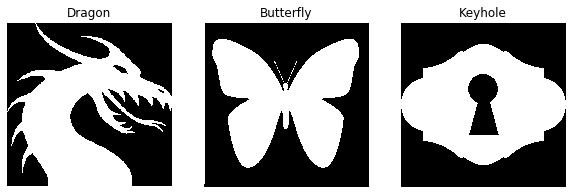

In [236]:
fig = plt.figure(figsize=(10,6))

ax1 = plt.subplot2grid((1,3), (0,0),)
ax2 = plt.subplot2grid((1,3), (0,1),)
ax3 = plt.subplot2grid((1,3), (0,2),)

ax1.imshow(dsk,cmap = 'gray')
ax2.imshow(bsk,cmap = 'gray')
ax3.imshow(ksk,cmap = 'gray')

ax1.set_title('Dragon')
ax2.set_title('Butterfly')
ax3.set_title('Keyhole')

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")

plt.show()

## Q2

In [14]:
def add_padding(image, padding, value):
    return cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=value)

In [15]:

kernel2 = np.array ([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype = np.uint8)

def Erode(image, kernel, padding=1):
    out = image.copy() 
    padded = add_padding(image, padding, 1)
    vertical_window = padded.shape[0] - kernel.shape[0]
    horizontal_window = padded.shape[1] - kernel.shape[1]
    for vertical_pos in range(vertical_window+1):
        for horizontal_pos in range(horizontal_window+1):
            erosion_flag = False
            for i in range(kernel.shape[0]):
                for j in range(kernel.shape[1]):
                    if kernel[i][j] == 1:
                        if padded[vertical_pos+i][horizontal_pos+j] == 0:
                            erosion_flag = True 
                            break
                if erosion_flag:
                    out[vertical_pos, horizontal_pos] = 0 
                    break
    return out

def Dilate(image, kernel, padding=1):
    out = image.copy()
    padded = add_padding(image, padding, 0)
    vertical_window = padded.shape[0] - kernel.shape[0]
    horizontal_window = padded.shape[1] - kernel.shape[1]    
    for vertical_pos in range(vertical_window+1):
        for horizontal_pos in range(horizontal_window+1):
            dilation_flag = False
            for i in range(kernel.shape[0]):
                for j in range(kernel.shape[1]):
                    if kernel[i][j] == 1:
                         if padded[vertical_pos+i][horizontal_pos+j] == 1:
                            dilation_flag = True
                            break                            
                if dilation_flag: 
                    out[vertical_pos, horizontal_pos] = 1
                    break
    return out



In [16]:
def Erosion(im,kernel,iters=3,padding=1):
    for i in range(iters):
        im = Erode(im, kernel, padding)
    return im

def Dilation(im,kernel,iters=3,padding=1):
    for i in range(iters):
        im = Dilate(im, kernel)
    return im

In [17]:
def Opening(im,kernel):
    im = Erosion(im,kernel,iters=1,padding=1)
    im = Dilation(im,kernel,iters=1,padding=1)
    return im

def Closing(im,kernel):
    im = Dilation(im,kernel,iters=1,padding=1)
    im = Erosion(im,kernel,iters=1,padding=1)
    return im

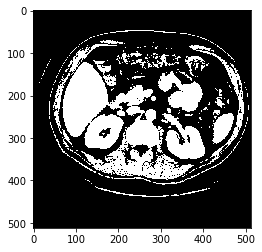

In [18]:
ct = cv2.imread("../images/kidney.jpg",0)
ct = cv2.threshold(ct, 128, 255, cv2.THRESH_BINARY)[1]
plt.imshow(ct,cmap='gray')

In [19]:
kernel = np.ones((3,3))

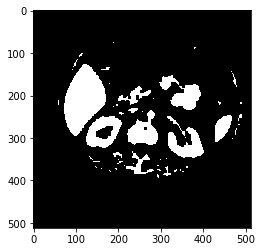

In [20]:
erosion = Erosion(ct,kernel,3,1)
plt.imshow(erosion,cmap='gray')

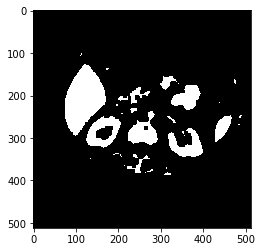

In [21]:
opening = Opening(erosion,kernel) 
plt.imshow(opening,cmap='gray')

In [22]:
def FloodFill4(I, X, Y, Label):
    if (X < 0 or X >= I.shape[0] or Y < 0 or Y >= I.shape[1]) : return
    if visited[X,Y]: return
    
    out[X,Y]= Label
    visited[X][Y] = True
    if I[X-1,Y]: FloodFill(I, X-1, Y, Label)
    if I[X+1,Y]: FloodFill(I, X+1, Y, Label)
    if I[X,Y-1]: FloodFill(I, X, Y-1, Label)
    if I[X,Y+1]: FloodFill(I, X, Y+1, Label)

def connComps(I,sigma=1,meanFrac=0.8):
    img = filters.gaussian(I, sigma)
    I = img > meanFrac*img.mean()
    Label= 1
    visited = np.full(im.shape[:2], False, dtype=bool)
    out = np.zeros(I.shape)
    for Y in range(I.shape[1]):
        for X in range(I.shape[0]):
            if I[X, Y]:
                FloodFill4(I, X, Y, Label)
                Label+= 1
    return out, Label


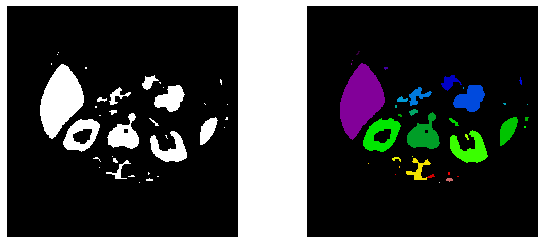

In [24]:
blobs_labels, nlab = connComps(opening,0.5,0.9)
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(blobs_labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

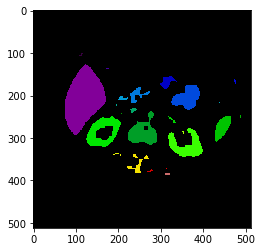

In [25]:
closing = Closing(blobs_labels,kernel) 
plt.imshow(closing,cmap='nipy_spectral')

## Q3

In [27]:
k5 = np.array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]],dtype='uint8')

(-0.5, 443.5, 772.5, -0.5)

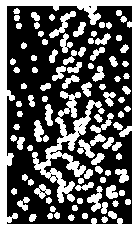

In [28]:
coins = cv2.imread('../images/coins.jpg',cv2.IMREAD_GRAYSCALE)
coins = cv2.threshold(coins, 128, 255, cv2.THRESH_BINARY)[1]
plt.imshow(coins,cmap='gray')
plt.axis('off')

In [29]:
def zeroPad(im,pad,value):
    out = value*np.ones((im.shape[0]+2*pad,im.shape[1]+2*pad))
    out[pad:out.shape[0]-pad,pad:out.shape[1]-pad] = im
    return out

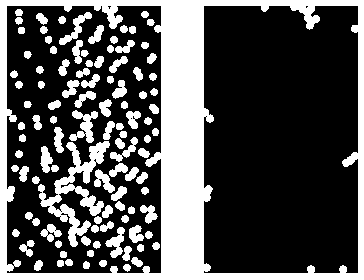

In [30]:
cnew = zeroPad(coins, 10, 255)
clb, n = connComps(cnew)
boundaryLabel = clb[0][0]
tb = clb.copy()
tb[tb!=boundaryLabel] = 0
tb[tb==boundaryLabel] = 255
touchingBoundary = tb[10:tb.shape[0]-10,10:tb.shape[1]-10]

plt.subplot(121)
plt.imshow(coins, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(touchingBoundary, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

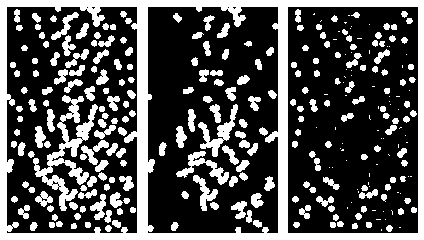

In [31]:

ek1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,24))
dopening = Opening(coins,ek1) 
copen1d = cv2.dilate(copen1, disk(3), iterations=1)

ek2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(24,13))
dopening = Opening(coins,ek2) 
copen2d = cv2.dilate(copen2, disk(3), iterations=1)

b = np.logical_or(copen1d, copen2d)
overlap = 255*np.logical_and(b,coins).astype(int)
non_overlap = 255*np.greater(coins,overlap)

plt.subplot(131)
plt.imshow(coins, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(overlap, cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(non_overlap, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

## Q4

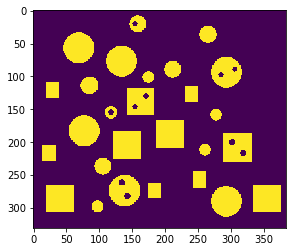

In [32]:
obj = cv2.imread('../images/objects.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(obj)

In [33]:
def euler_numbers(L):
    padded = np.pad(L, ((1,0), (1,0)), 'constant')
    nw = padded[:-1,:-1]
    n  = padded[:-1,1:]
    w  = padded[1:,:-1]
    
    uc = np.logical_and(L,(L != n))
    uc = np.logical_and(uc, (L != nw))
    uc = np.logical_and(uc,  (L != w))
    ucLab = L[uc];
    tuc = np.bincount(ucLab)[1:]

    uco = np.logical_and(L,(L != nw))
    uco = np.logical_and(uco, (L == n))
    uco = np.logical_and(uco, (L == w))
    ucoLab = L[uco]
    tuco = np.bincount(ucoLab)[1:]
    return tuc - tuco


In [34]:
L, _ = connComps(obj)
e = euler_numbers(L)

nholes = np.sum(e<=0)
print('Number of objects with one or more holes: %d'%nholes)

Number of objects with one or more holes: 6


In [35]:
m = np.array([[1,1,1],[1,0,0],[1,0,0]])
h = np.array([[0,0,0],[0,1,0],[0,0,0]])
s = hm(obj,structure1=h,structure2=m)
_,ns = connComps(s)
print('Number of square objects in the image :',ns)

Number of square objects in the image : 11


In [36]:
def getObjWithHoles(obj):
    L,_ = connComps(obj)
    hlist = []
    stats = np.array(regionprops(L))
    for i in range(len(stats)):
        if stats[i].euler_number < 1:
            hlist.append(i+1)
    print(hlist)
    holeObj = np.zeros(obj.shape)
    for i in hlist:
        holeObj[L == i] = 1
    return holeObj

[1, 5, 11, 12, 17, 22]


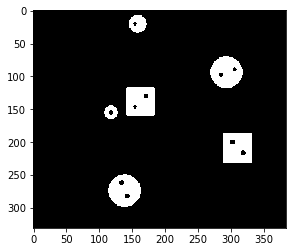

In [37]:
plt.imshow(getObjWithHoles(obj), cmap='gray')

In [40]:
cobj = Opening(obj,square(8)) 
copen2 = Opening(obj,square(35)) 
sqObj35 = 255*np.logical_and(obj,copen2).astype(int)

[1, 5, 11, 12, 17, 22]


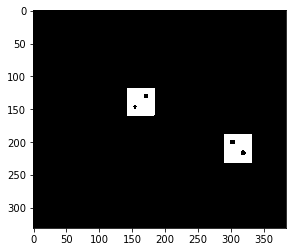

In [41]:
holeObj = getObjWithHoles(obj)
holeSq = 255*np.logical_and(holeObj,copen2).astype(int)
plt.imshow(holeSq,cmap='gray')

In [42]:
elist = []
stats = np.array(regionprops(L))
for i in range(len(stats)):
    if stats[i].eccentricity < 0.25:
        elist.append(i+1)
sObj = np.zeros(obj.shape)
for i in elist:
    sObj[L == i] = 1

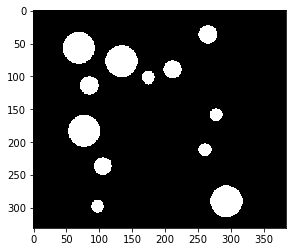

In [43]:

closedHoleObj = 255*Closing(holeObj,disk(5))
cir = Closing(np.uint8(255*(sObj>sqObj35)),disk(4))
circles = Opening(cir,disk(5))
noHoleCircles = np.uint8(255*(circles>closedHoleObj))
plt.imshow(noHoleCircles, cmap='gray')

## Q5

In [44]:
def FloodFill8(I, X, Y, Label):
    if (X < 0 or X >= I.shape[0] or Y < 0 or Y >= I.shape[1]) : return
    if visited[X,Y]: return
    
    out[X,Y]= Label
    visited[X][Y] = True
    for x in range(X-1,X+1):
        for y in range(Y-1,Y+1):
            if I[x,y]: FloodFill(I, x, y, Label)

def CCL8(I,sigma,meanFrac):
    img = filters.gaussian(I, sigma)
    I = img > meanFrac*img.mean()
    Label= 1
    visited = np.full(im.shape[:2], False, dtype=bool)
    out = np.zeros(I.shape)
    for Y in range(I.shape[1]):
        for X in range(I.shape[0]):
            if I[X, Y]:
                FloodFill8(I, X, Y, Label)
                Label+= 1
    return out, Label

In [46]:
txt = cv2.imread('../images/colourful_text.png',cv2.COLOR_BGR2RGB)
txt = txt[15:660,15:856]

In [47]:
def getNumCompsPerColor(txt):
    grayTxt = 255 - (0.2*txt[:,:,0]+0.3*txt[:,:,1]+0.5*txt[:,:,2])
    gSeg = []
    
    g1 = cv2.threshold(grayTxt, 100, 255, cv2.THRESH_BINARY)[1] - cv2.threshold(grayTxt, 140, 255, cv2.THRESH_BINARY)[1]
    g1 = cv2.morphologyEx(g1, cv2.MORPH_OPEN, disk(2))
    g4 = cv2.threshold(grayTxt, 193, 255, cv2.THRESH_BINARY)[1]
    g2 = cv2.threshold(grayTxt, 188, 255, cv2.THRESH_BINARY)[1] - g4
    g3 = cv2.threshold(grayTxt, 183, 255, cv2.THRESH_BINARY)[1] - g4 - g2
    g5 = cv2.threshold(grayTxt, 140, 255, cv2.THRESH_BINARY)[1] - cv2.threshold(grayTxt, 153, 255, cv2.THRESH_BINARY)[1] 

    gSeg.append(g1)
    gSeg.append(g2)
    gSeg.append(g3)
    gSeg.append(g4)
    gSeg.append(g5)
    
    nComps = 5
    sigma = [0.5,0.5,0.6,0.6,0.1]
    mF = [0.8,0.8,0.8,0.8,0.8]
    for i in range(5):
        _,nc = CCL8(gSeg[i],sigma=sigma[i],meanFrac=mF[i])
        print("Number of components for color",i,":",nc)
    return gSeg

In [48]:
gSeg = getNumCompsPerColor(txt)

Number of components for color 0 : 22
Number of components for color 1 : 27
Number of components for color 2 : 28
Number of components for color 3 : 106
Number of components for color 4 : 34


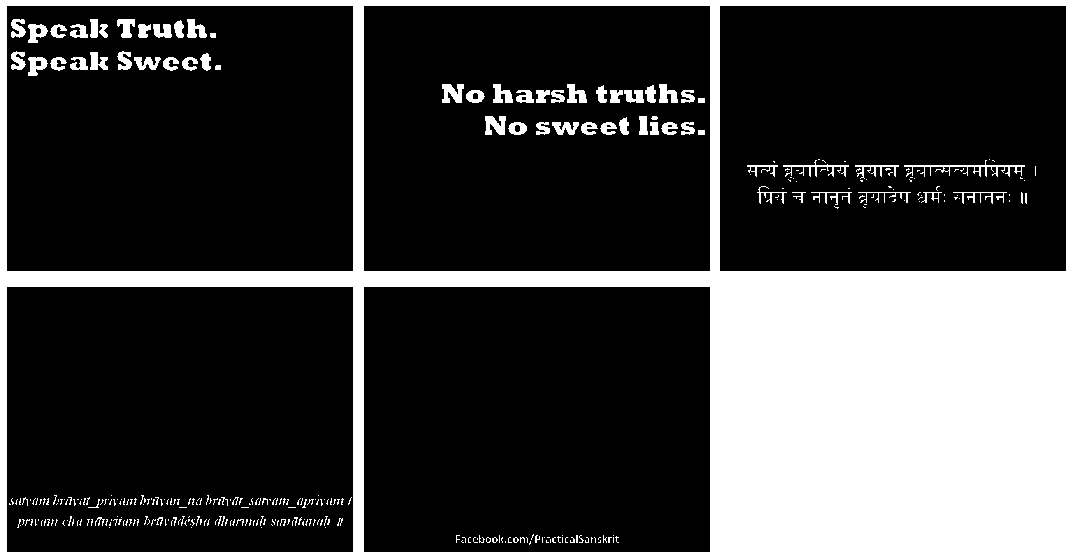

In [49]:
plt.figure(figsize=(15,8))
plt.subplot(231)
plt.imshow(gSeg[0], cmap='gray')
plt.axis('off')
plt.subplot(232)
plt.imshow(gSeg[1], cmap='gray')
plt.axis('off')
plt.subplot(233)
plt.imshow(gSeg[2], cmap='gray')
plt.axis('off')
plt.subplot(234)
plt.imshow(gSeg[3], cmap='gray')
plt.axis('off')
plt.subplot(235)
plt.imshow(gSeg[4], cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

In [312]:
def adapthresh(img, w, k):
    width, height = img.shape
    new = np.zeros(img.shape)
    im1 = np.zeros(img.shape)
    im2 = np.zeros(img.shape)

    for i in range(width):
        for j in range(height):
            pixel = img[i, j]
            
            if i>0 and j>0:
                im1[i][j] = i1[i-1][j] - im1[i-1][j-1] + im1[i][j-1] + pixel
                im2[i][j] = im2[i-1][j] - im2[i-1][j-1] + im2[i][j-1] + pixel**2
            elif j>0:
                im1[i][j] = im1[i][j-1] + pixel
                im2[i][j] = im2[i][j-1] + pixel**2
            elif i>0:
                im1[i][j] = im1[i-1][j] + pixel
                im2[i][j] = im2[i-1][j] + pixel**2
            else:
                im1[i][j] = pixel
                im2[i][j] = pixel**2

    for i in range(width):
        for j in range(height):
            pixel = img[i, j]

            ip = int(i+w/2)
            im = int(i-w/2)
            jp = int(j+w/2)
            jm = int(j-w/2)

            if im < 0:
                im = 0
            if jm < 0:
                jm = 0
            if ip >= width:
                ip = width-1
            if jp >= height:
                jp = height-1

            mean = (I[ip, jp] + I[im, jm] - I[ip, jm] - I[im, jp]) / w**2
            sigma = I2[ip, jp] + I2[im, jm] - I2[ip, jm] - I2[im, jp]

            sigma = np.sqrt(sigma - (w**2*(mean**2))) / w**2
            t = mean * (1.0 + k * ((sigma/128.0) - 1.0))
            if pixel > t:
                pixel = 255.0
            if pixel  <= t:
                pixel = 0.0
            new[i, j] = int(pixel)

    return new

In [50]:
telugu = cv2.imread('../images/telugu.jpeg',0)
tamil = cv2.imread('../images/tamil.jpeg',0)

telugu = adapthresh(telugu,6,0.2)
tamil = adapthresh(tamil,6,0.2)

In [ ]:
# telugu = 255-cv2.adaptiveThreshold(telugu,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,19,7)
# tamil = 255-cv2.adaptiveThreshold(tamil,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,19,9)

In [51]:
def getObjWith1Hole(obj,sigma=0.3):
    L,_ = CCL8(obj,sigma=sigma)
    hlist = []
    stats = np.array(regionprops(L))
    for i in range(len(stats)):
        if stats[i].euler_number == 0:
            hlist.append(i+1)
    #print(hlist)
    holeObj = np.zeros(obj.shape)
    for i in hlist:
        holeObj[L == i] = 1
    return holeObj

def getObjWith2Holes(obj,sigma=0.3):
    L,_ = CCL8(obj,sigma=sigma)
    hlist = []
    stats = np.array(regionprops(L))
    for i in range(len(stats)):
        if stats[i].euler_number == -1:
            hlist.append(i+1)
    holeObj = np.zeros(obj.shape)
    for i in hlist:
        holeObj[L == i] = 1
    return holeObj

In [52]:
tel1H = getObjWith1Hole(telugu)
tel2H = getObjWith2Holes(telugu)

tam1H = getObjWith1Hole(tamil)
tam2H = getObjWith2Holes(tamil)

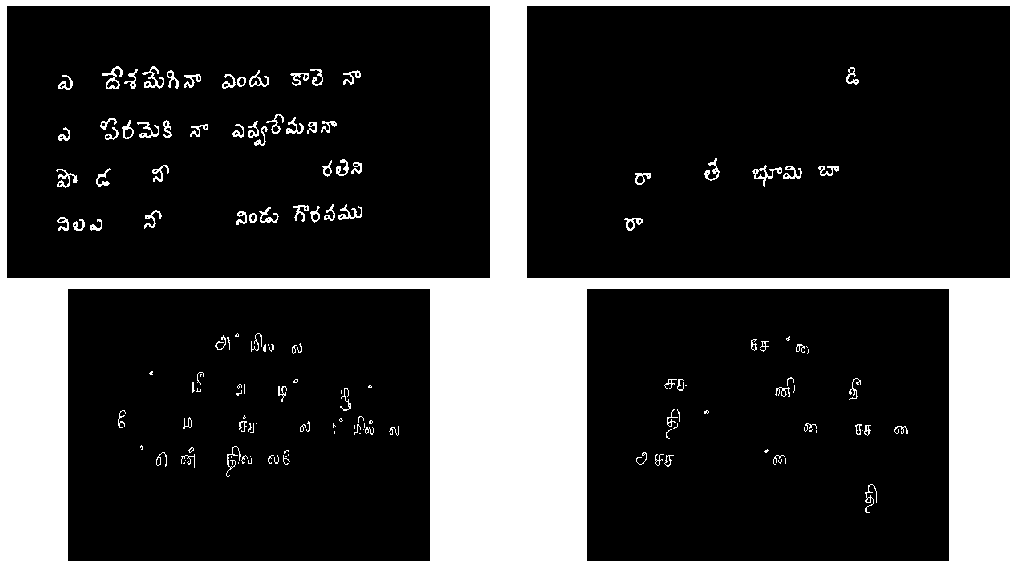

In [53]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.imshow(tel1H, cmap='gray')
plt.axis('off')
plt.subplot(222)
plt.imshow(tel2H, cmap='gray')
plt.axis('off')
plt.subplot(223)
plt.imshow(tam1H, cmap='gray')
plt.axis('off')
plt.subplot(224)
plt.imshow(tam2H, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

## Q6

<h5>Upscaling by a factor k</h5><br>
To upscale the label map of a scene, 2 methods can be followed :<br>
<li>Replication</li>
<li>Interpolation</li>
A label scene array of size WxH per band would be upscaled to WkxHk. Algorithm for upscaling will determine the (k-1) pixels that are inserted between each pixel.<br>
Upscaling by replication is simple where each pixel is repeated k times in both height and width dimensions for all the bands.<br>
Whereas for upscaling by interpolation, the (k-1) pixels between 2 original pixels are filled with values calculated by interpolation between the 2 original pixels in both height and width dimensions.

In [246]:
n = 12
l = 256
np.random.seed(1)
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
cc1,_ = connComps(im,5,0.7)
labImg = label2rgb(cc1,bg_label=0)

In [276]:
def upscale(img,k):
    hi,wi,bi = img.shape
    wo = int(wi*k)
    ho = int(hi*k)
    upImg = np.empty((wo,ho,bi))
    for b in range(bi):
        for i in range(wo):
            for j in range(ho):
                upImg[i,j,b] = img[i//k,j//k,b]
    return upImg

In [277]:
upm = upscale(labImg,2)

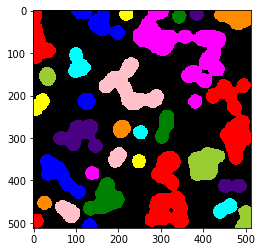

In [278]:
plt.imshow(upm)

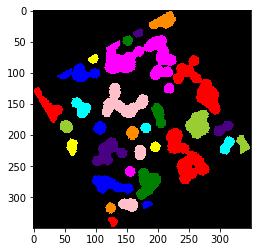

In [285]:
rotMap = rotate_label_map(labImg,30)
plt.imshow(rotMap)

## Q7

In [60]:
dog = cv2.imread('../images/dog.jpg',0)

In [66]:
def coordRot(x, y, theta, ox, oy):
    s, c = np.sin(theta), np.cos(theta)
    x, y = np.asarray(x) - ox, np.asarray(y) - oy
    return x * c - y * s + ox, x * s + y * c + oy

def rotate_image(image, angle, fill=0):
    ox = image.shape[0]//2
    oy = image.shape[1]//2    
    theta = angle * np.pi / 180
    theta = -theta
    sh, sw = image.shape

    cx, cy = coordRot([0, sw, sw, 0], [0, 0, sh, sh], theta, ox, oy)
    dw, dh = (int(np.ceil(c.max() - c.min())) for c in (cx, cy))
    dx, dy = np.meshgrid(np.arange(dw), np.arange(dh))
    sx, sy = coordRot(dx + cx.min(), dy + cy.min(), -theta, ox, oy)
    sx, sy = sx.round().astype(int), sy.round().astype(int)
    mask = (0 <= sx) & (sx < sw) & (0 <= sy) & (sy < sh)
    dest = np.zeros((dh, dw), dtype=image.dtype)
    dest[dy[mask], dx[mask]] = image[sy[mask], sx[mask]]
    dest[dy[~mask], dx[~mask]] = fill
    return dest

In [284]:
def rotate_label_map(labelMap,angle):
    b = labelMap.shape[2]
    outb1 = rotate_image(labelMap[:,:,0],angle)
    rotatedMap = np.zeros((outb1.shape[0],outb1.shape[1],b))
    rotatedMap[:,:,0] = outb1
    for i in range(b-1):
        rotatedMap[:,:,i+1] = rotate_image(labelMap[:,:,i+1],angle)
    return rotatedMap

In [67]:
def rotate_crop(image, angle):
    hr, wr = image.shape
    rotated = rotate_image(image, angle)
    out = np.zeros(image.shape)
    h, w = rotated.shape
    
    if h >= hr and w >= wr: 
        y1 = (h - hr)//2
        y2 = y1 + hr
        x1 = (w - wr)//2
        x2 = x1 + wr
        out = rotated[y1:y2, x1:x2]
    
    elif h < hr and w >= wr: 
        y1 = (hr - h)//2
        y2 = hr - y1
        x1 = (w - wr)//2
        x2 = x1 + wr
        out[y1:y2, :] = rotated[:, x1:x2]
    
    elif h >= hr and w < wr: 
        y1 = (h - hr)//2
        y2 = y1 + hr
        x1 = (wr - w)//2
        x2 = wr - x1
        out[:, x1:x2] = rotated[y1:y2, :]

    return out

In [68]:
def rotImage(image, angle, retain=False):
    if retain:
        return rotate_crop(image, angle)
    else:
        return rotate_image(image, angle)

In [69]:
angles = [30,45,75,90,120]

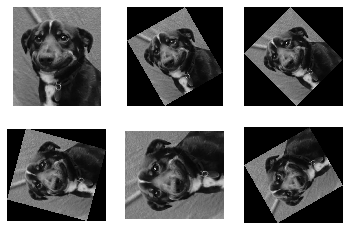

In [70]:
imArr = []
for angle in angles:
    imArr.append(rotImage(dog, angle, retain=False))
    
plt.subplot(231)
plt.imshow(dog,cmap='gray')
plt.axis('off')
plt.subplot(232)
plt.imshow(imArr[0],cmap='gray')
plt.axis('off')
plt.subplot(233)
plt.imshow(imArr[1],cmap='gray')
plt.axis('off')
plt.subplot(234)
plt.imshow(imArr[2],cmap='gray')
plt.axis('off')
plt.subplot(235)
plt.imshow(imArr[3],cmap='gray')
plt.axis('off')
plt.subplot(236)
plt.imshow(imArr[4],cmap='gray')
plt.axis('off')

plt.show()

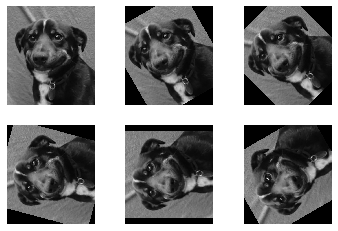

In [71]:
nimArr = []
for angle in angles:
    nimArr.append(rotImage(dog, angle, retain=True))
    
plt.subplot(231)
plt.imshow(dog,cmap='gray')
plt.axis('off')
plt.subplot(232)
plt.imshow(nimArr[0],cmap='gray')
plt.axis('off')
plt.subplot(233)
plt.imshow(nimArr[1],cmap='gray')
plt.axis('off')
plt.subplot(234)
plt.imshow(nimArr[2],cmap='gray')
plt.axis('off')
plt.subplot(235)
plt.imshow(nimArr[3],cmap='gray')
plt.axis('off')
plt.subplot(236)
plt.imshow(nimArr[4],cmap='gray')
plt.axis('off')

plt.show()